In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as mpl_cm
import pandas as pd
import cv2  
from os import listdir 
from os.path import isfile, join 
import os 
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline 
import random 
from defisheye import Defisheye
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import LinearSVC 
import joblib 






def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()

(1024, 1024)


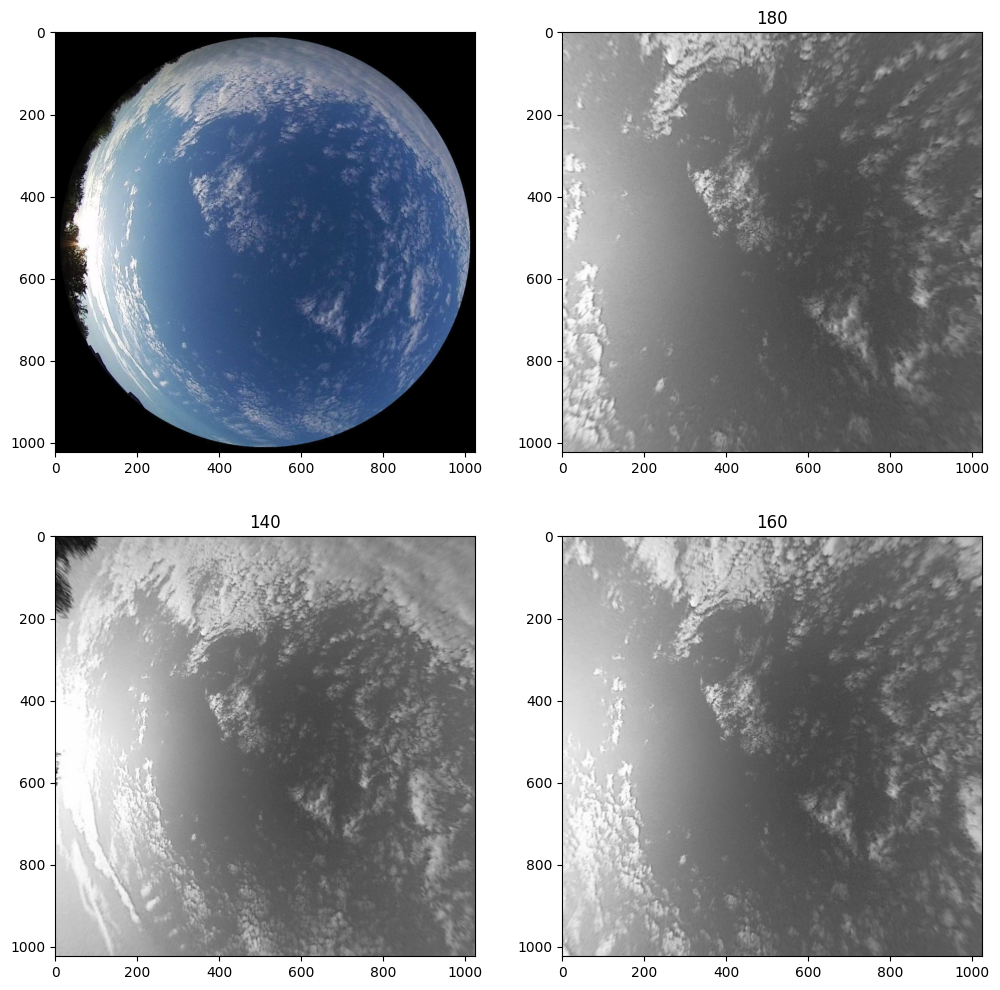

In [52]:



def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


img= "./TJNU-GRSCD/train/2_altocumulus/2_altocumulus_000053.jpg"

dtype = 'linear'
format = 'circular'
fov = 180
fov2=140
fov3=160
pfov = 120

image = cv2.imread(img)  
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
obj2 = Defisheye(img, dtype=dtype, format=format, fov=fov2, pfov=pfov)
obj3 = Defisheye(img, dtype=dtype, format=format, fov=fov3, pfov=pfov)

new_image = obj.convert()
new_image= cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

new_image2 = obj2.convert()
new_image2= cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)

new_image3 = obj3.convert()
new_image3= cv2.cvtColor(new_image3, cv2.COLOR_BGR2GRAY)



fig, axes= plt.subplots(2,2,figsize=(12,12)) 
axes=axes.flat

axes[0].imshow(image)
axes[1].imshow(new_image,cmap='Greys_r')
axes[1].set_title(f'{fov}')
axes[2].imshow(new_image2,cmap='Greys_r')
axes[2].set_title(f'{fov2}')
axes[3].imshow(new_image3,cmap='Greys_r')
axes[3].set_title(f'{fov3}')


print(new_image2.shape)

In [ ]:
# def transform_raw_image(image_file, fov): 
#     """
#     using the openCV and defisheye libraries convertes a fisheye image to rectilinear image and converts it from bgr to grey scale 
#     Returns the image as an numpy array 
#     """
#     image = cv2.imread(image_file)
#     dtype = 'linear'
#     format = 'circular'
#     pfov = 120
#     obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
#     new_image = obj.convert()
#     new_image= cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
#     return new_image
    
    

In [ ]:
# path= "./TJNU-GRSCD"
# path_test=path+"/test"
# path_train=path+"/train" 

# class_dir_test=listdir(path_test)
# class_dir_train=listdir(path_train)

# test_addresses=[]
# training_addresses=[]
# class_names=[]

# for dir in class_dir_test: 
#     test_addresses.append(listdir(path_test+"/"+dir))
#     class_names.append(dir[2:])
# for dir in class_dir_train: 
#     training_addresses.append(listdir(path_train+"/"+dir))


# support_dir=[ len(x) for x in test_addresses ]
# train_support=[ len(x) for x in training_addresses ]

# print("test:", support_dir)
# print("train:",train_support)
# print("combined:", np.array(support_dir)+np.array(train_support))
# print("classes:",class_names)






test: [748, 331, 673, 688, 463, 587, 510]
train: [690, 400, 650, 650, 500, 600, 510]
combined: [1438  731 1323 1338  963 1187 1020]
clases: ['cumulus', 'altocumulus', 'cirrus', 'clearsky', 'stratocumulus', 'cumulonimbus', 'mixed']


In [167]:
# # Randomly selecting 10% of training data. 
# nsample_category= np.array([int(len(x)//10) for x in training_addresses ]) 

# seed(42)# set randomseed  

# transformed_data_path="./slask/" 

# fovs=[140,160,180]

# for i in range(len(class_names)): 
#     subSample = sample(training_addresses[i], nsample_category[i]) 
#     datadir= transformed_data_path+class_names[i]
#     for fov in fovs: 
#         current_datadir=datadir+f"{fov}/"
        
#         Path(current_datadir ).mkdir(parents=True, exist_ok=True) 
        
#         for sample in subSample: 
#             image=transform_raw_image(sample, fov)
#             cv2.imwrite(current_datadir+sample, image)





In [7]:
####################### new dataset ###########################################


dirpath="./CCSN_v2"
class_dirs=listdir(dirpath)
lists_image_names=[]
for dir in class_dirs: 
    lists_image_names.append(listdir(dirpath+"/"+dir))


images= []
y=[] 
for  i in range(len(class_dirs)): 
    for image_name in lists_image_names[i]: 
        im=cv2.imread( dirpath+"/"+class_dirs[i]+"/"+image_name )
        images.append( im  )
        y.append(class_dirs[i])

y=np.array(y)

(256, 256, 3)


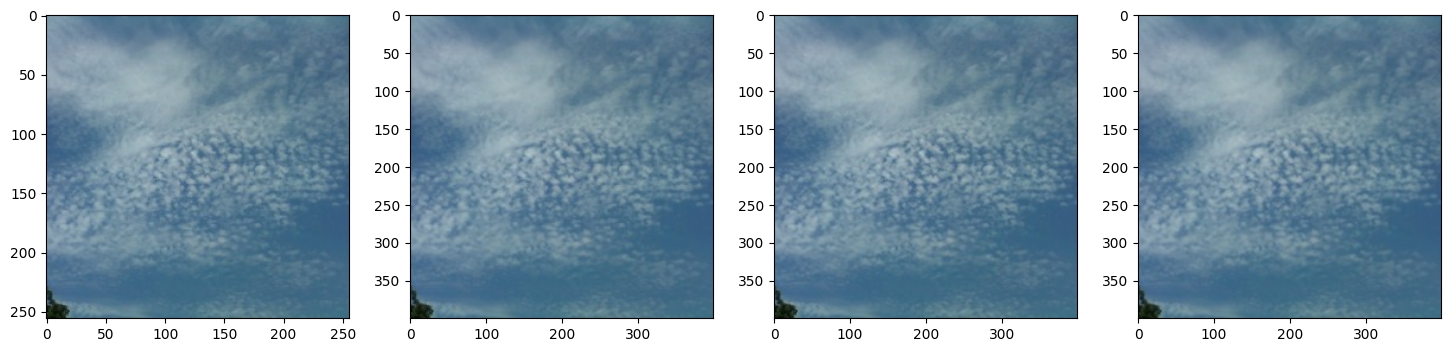

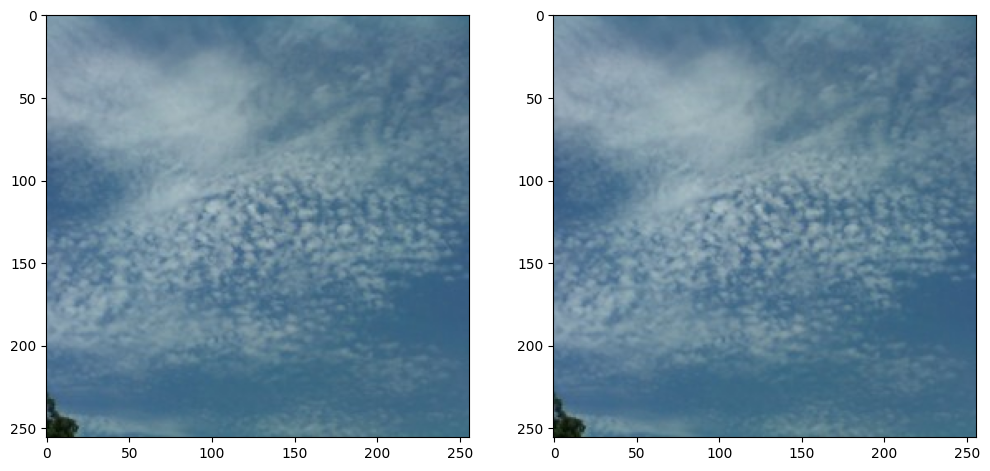

In [101]:
im_256_ex= cv2.imread(dirpath+"/Cc/"+"Cc-N179.jpg")
im_256_ex=cv2.cvtColor(im_256_ex, cv2.COLOR_BGR2RGB)

n=400
im_400_resampled = cv2.resize(im_256_ex, (n,n), interpolation=cv2.INTER_AREA)
im_400_resampled2 = cv2.resize(im_256_ex, (n,n), interpolation=cv2.INTER_CUBIC)
im_400_resampled3 = cv2.resize(im_256_ex, (n,n), interpolation=cv2.INTER_LINEAR)


im_256_restored= cv2.resize(im_400_resampled2, (256,256), interpolation=cv2.INTER_CUBIC)
fig,ax=plt.subplots(1,4, figsize=(18,6) )

ax[0].imshow(im_256_ex)
ax[1].imshow(im_400_resampled)
ax[2].imshow(im_400_resampled2)
ax[3].imshow(im_400_resampled3)

fig2,ax2=plt.subplots(1,2, figsize=(12,6) )

ax2[0].imshow(im_256_ex)
ax2[1].imshow(im_256_restored)



print(im_256_ex.shape)


In [2]:
class ImageResizer(BaseEstimator, TransformerMixin):
    """
    A custom transformer to resize images to a specified size.

    This transformer takes an iterable of images (e.g., a list or a NumPy array)
    and resizes each image to a target size using OpenCV's cv2.resize function.

    The input `X` is expected to be a collection where each element
    is a valid image represented as a NumPy array.

    Attributes:
        height (int): The target height for the resized images.
        width (int): The target width for the resized images.
    """
    def __init__(self, height=400, width=400):
        self.height = height
        self.width = width

    def fit(self, X, y=None):
        """
        The fit method for the transformer.
        This transformer does not need to learn any parameters from the data,
        so the fit method simply returns self.

        Args:
            X (iterable): The input data (e.g., list of images).
            y (np.ndarray, optional): The target labels. Defaults to None.

        Returns:
            self: The fitted transformer instance.
        """
        return self

    def transform(self, X):
        """
        Resizes each image in the input iterable.
        and flatens them to a 1d representation: 
        an unflattened version maybe obtained by using the method unflaten 

        Args:
            X (iterable): The input data, expected to be an iterable of images.
                          Each element should be a NumPy array representing an image.

        Returns:
            np.ndarray: A new NumPy array containing a flattend representation of the resized images.
        """
        if not hasattr(X, '__iter__'):
            raise TypeError("Input must be an iterable (e.g., a list or NumPy array).")
        
        resized_images = []
        for i, image in enumerate(X):
            # Check if the individual item is a valid image (a NumPy array)
            if not isinstance(image, np.ndarray) or image.ndim not in [2, 3]:
                raise ValueError(f"Element at index {i} is not a valid image (expected 2D or 3D NumPy array), got {type(image)}.")

            try:
                # Resize the image using OpenCV
                resized_image = cv2.resize(image, (self.width, self.height), interpolation=cv2.INTER_CUBIC)
                resized_images.append(resized_image)
            except Exception as e:
                # This handles potential errors from cv2.resize for malformed arrays
                raise RuntimeError(f"Could not resize image at index {i}. Original shape: {image.shape}. Error: {e}")

        # It's a good practice for transformers to return a NumPy array
        # as a standard output type for subsequent steps in a pipeline.
        return np.array(resized_images)

    def flatten(self, X ): 
        flattend_images = []
        for i, image in enumerate(X):
            flattend_images.append(image.flatten())
        return np.array(flattend_images)

    def unflaten(self, X): 
        """
        returns an numpy array of 2d color images from a flattened representation of the resized images obtained with the transform method. 

        """
        if not hasattr(X, '__iter__'):
            raise TypeError("Input must be an iterable (e.g., a list or NumPy array).")
        
        unflattend_images = []
        for i, image in enumerate(X):
            # Check if the individual item is a valid image (a NumPy array)
            if not isinstance(image, np.ndarray) or image.ndim in[1]:
                raise ValueError(f"Element at index {i} is not a valid image (expected 1D NumPy array), got {type(image)}.")
            image_matrepr=image.reshape(self.height, self.width, len(X)//(self.higth*self.width)) 
            unflattend_images.append(image_matrepr)
    
        return np.array(unflattend_images)

    def add_grayscale(self,X): 
        if not hasattr(X, '__iter__'):
            raise TypeError("Input must be an iterable (e.g., a list or NumPy array).")
        
        rgb_gray_images = []
        for i, image in enumerate(X):
            # Check if the individual item is a valid image (a NumPy array)
            if not isinstance(image, np.ndarray) or image.ndim not in [ 3]:
                raise ValueError(f"Element at index {i} is not a valid image (expected 2D or 3D NumPy array), got {type(image)}.")

            try:
                # Resize the image using OpenCV
                grey_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #(mxn)
                grey_image=grey_image.reshape(grey_image.shape+(1,))#(mxnx1)
                im_rgb_Gray= np.concat((image,grey_image),axis=2)#(mxnx3)+(mxnx1)=(mxnx4) (rgb gray)
                rgb_gray_images.append(im_rgb_Gray)
            except Exception as e:
                # This handles potential errors from cv2.resize for malformed arrays
                raise RuntimeError(f"Could not resize image at index {i}. Original shape: {image.shape}. Error: {e}")
        return rgb_gray_images
    def add_rotation_copies(self,X,y):

        augmented_images=[] 
        augmented_labels=[]
        for i, image in enumerate(X):
            height, width = image.shape[:2]
 
            # Define the rotation center
            center = (width // 2, height // 2)
 
            # Define the rotation angle
            angles = [90,180,270]  # Rotate by 45 degrees
 
            # Define the scaling factor 
            scale = 1.0  # No scaling
            augmented_images.append(image)
            augmented_labels.append(y[i])
            for angle in angles:
                # Get the rotation matrix
                rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
 
                # Perform the rotation
                rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
                augmented_images.append(rotated_image)
                augmented_labels.append(y[i])
        return augmented_images,np.array(augmented_labels)



(400, 400, 3)


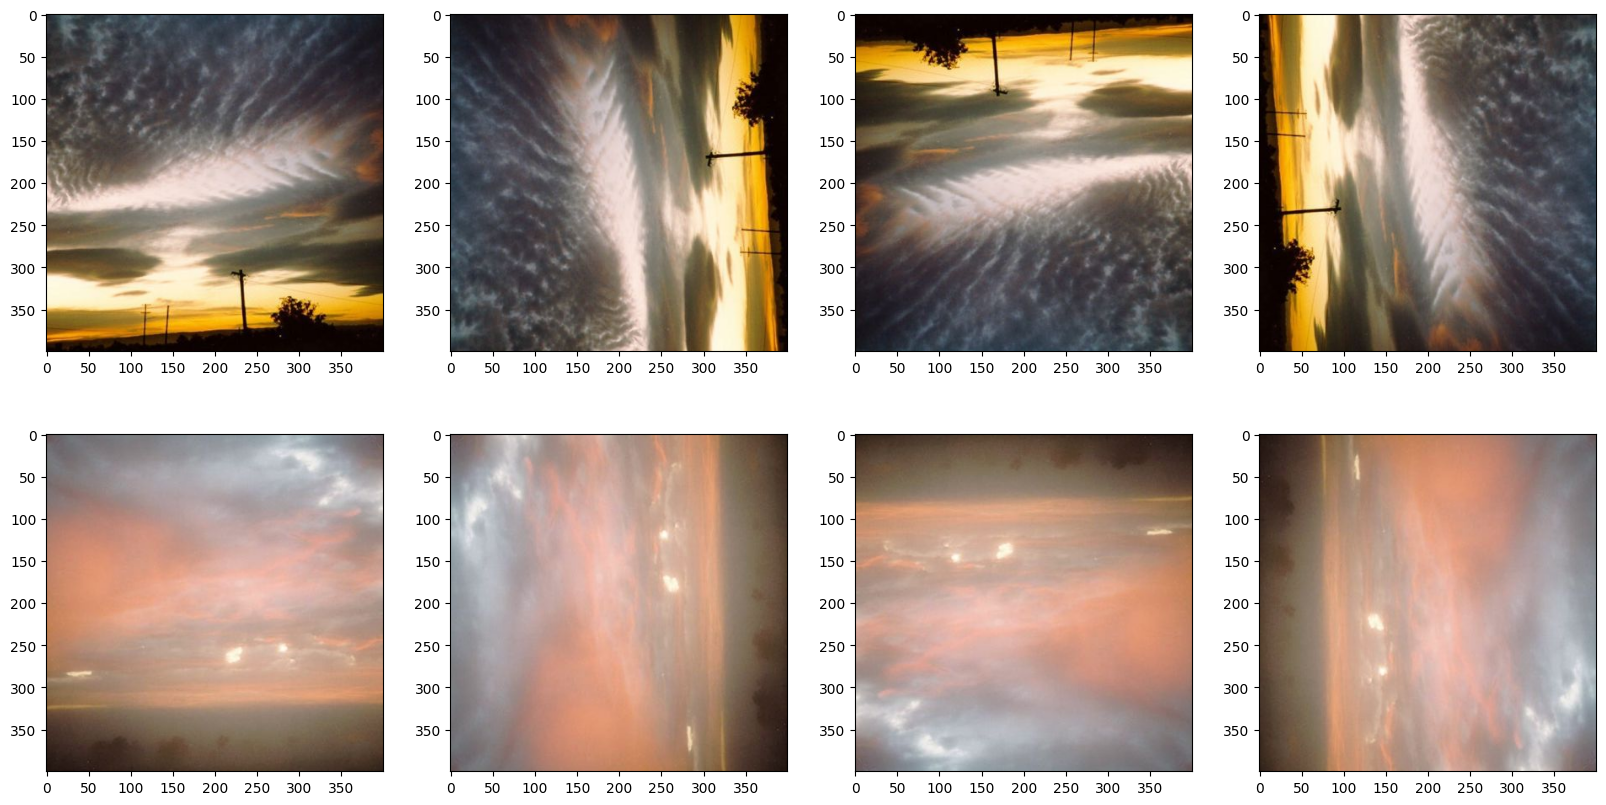

In [ ]:
#test that data augmentation works correctly 
test= [images[0],images[1]]
print(test[0].shape)

y_test=np.zeros(2)
resizer= ImageResizer()
test_rgbL,y_test= resizer.add_rotation_copies(test,y_test)

fig,ax = plt.subplots(2,4, figsize=(20,10))
ax=ax.flatten()

for i in range(8): 
     ax[i].imshow(test_rgbL[i])


15876


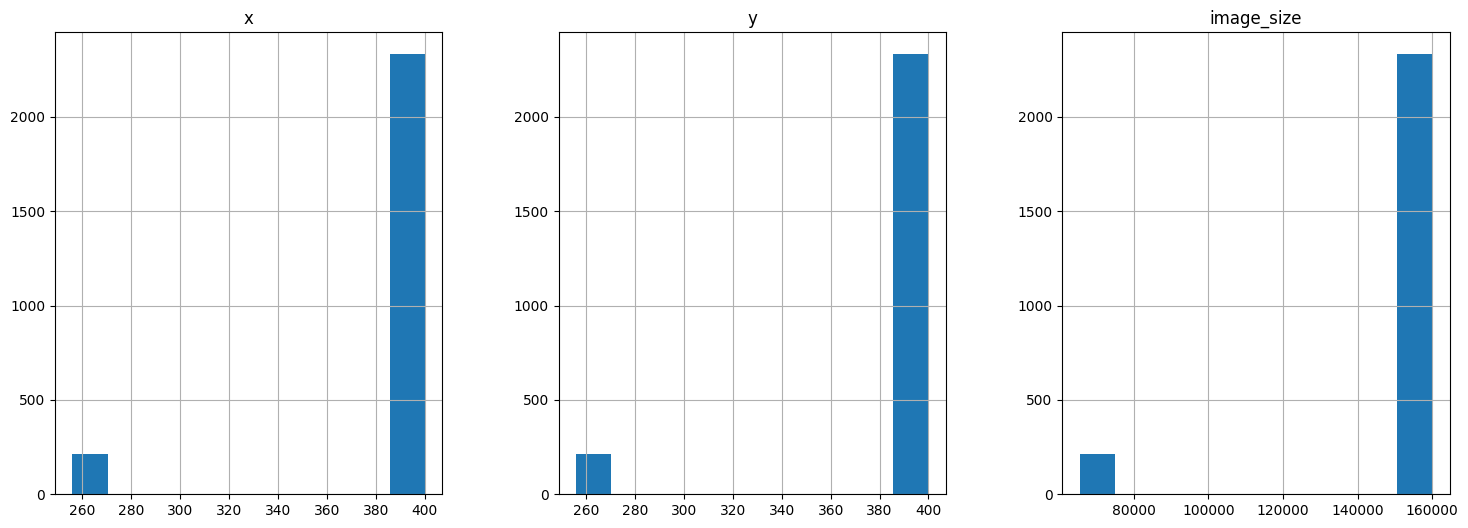

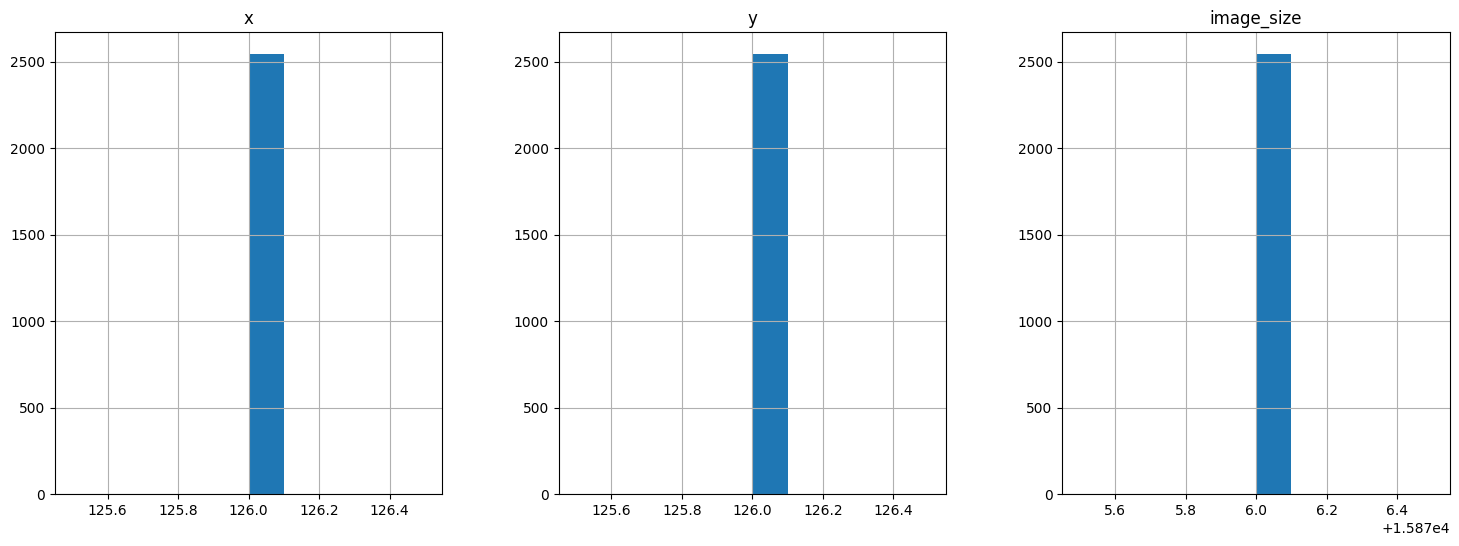

In [10]:
sizes=[M.shape for M in images] 
data= pd.DataFrame(sizes)
data=data.rename(columns={0: "x", 1: "y", 2: "z"})
data.head()

fig, axes= plt.subplots(1,3 ,figsize=(18,6) ) 
data.hist(column="x", ax=axes[0])
data.hist(column="y", ax=axes[1])
data['image_size']= data['x']*data['y']
data.hist(column='image_size', ax=axes[2])


nn=126
resizer = ImageResizer(height=nn, width=nn)

resized_images= resizer.transform(images)
resized_images= resizer.flatten(resized_images)

new_sizes=[len(M)//3 for M in resized_images] 
df= pd.DataFrame(new_sizes)
df=df.rename(columns={0:"image_size"})
df['x']=np.sqrt(df['image_size'])
df['y']=np.sqrt(df['image_size'])
fig2, axes2= plt.subplots(1,3 ,figsize=(18,6) ) 
df.hist(column="x", ax=axes2[0])
df.hist(column="y", ax=axes2[1])
df.hist(column='image_size', ax=axes2[2])

print(df['image_size'][0])

In [3]:

dirpath="./CCSN_v2"
class_dirs=listdir(dirpath)
lists_image_names=[]
for dir in class_dirs: 
    lists_image_names.append(listdir(dirpath+"/"+dir))


images= []
y=[] 
for  i in range(len(class_dirs)): 
    for image_name in lists_image_names[i]: 
        im=cv2.imread( dirpath+"/"+class_dirs[i]+"/"+image_name )
        im= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        images.append(im)
        y.append(class_dirs[i])

y=np.array(y)





In [4]:

def preprocessing(n,n_comp , images,y): 
    imResizer=ImageResizer(height=n, width=n)
    images_rgb_gray= imResizer.add_grayscale(images)
    resized_images= imResizer.transform(images_rgb_gray)
    augmented_resized_images,augmented_y =imResizer.add_rotation_copies(resized_images,y)
    images_training_data= imResizer.flatten(augmented_resized_images)



    X_train_val, X_test, y_train_val , y_test =train_test_split(images_training_data, augmented_y ,test_size=0.1 ,random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42)


    rescaler=StandardScaler() 

    X_train=rescaler.fit_transform(X_train)
    X_val=rescaler.transform(X_val)
    X_test=rescaler.transform(X_test)

    pca=PCA(n_components=n_comp, random_state=42) 
    #pca=KernelPCA(n_components=n_comp,kernel="cosine", random_state=42 ) 
    X_train=pca.fit_transform(X_train) 
    X_val=pca.transform(X_val) 
    X_test=pca.transform(X_test) 
    
    return X_train,X_val,X_test,y_train,y_val, y_test , X_train_val,y_train_val



Text(0.5, 1.0, 'log')

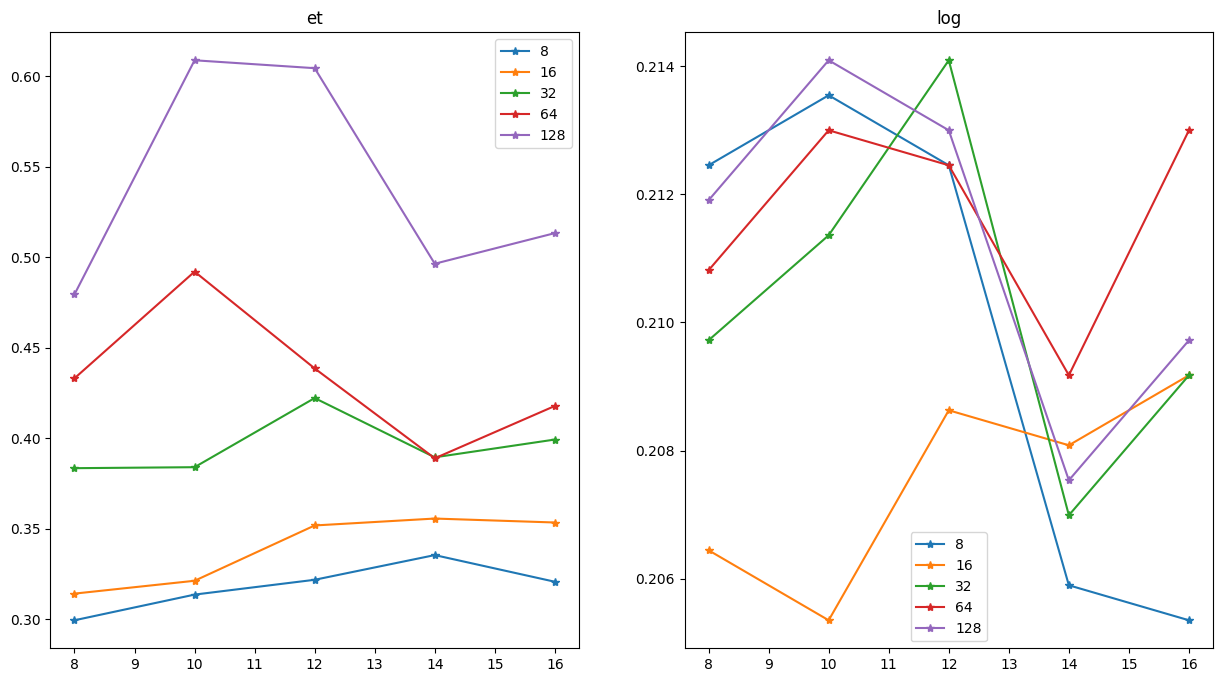

In [22]:
ns=[8,16,32,64,128]
n_comps= [8,10,12,14,16]

scores_image_sizes_et= []
scores_image_sizes_log= []

for n in ns: 
    scores_et=[]
    scores_log=[]
    for n_comp in n_comps: 
        X_train,X_val,X_test,y_train,y_val, y_test , X_train_val,y_train_val=preprocessing(n,n_comp,images,y )
        extra_trees_clf = ExtraTreesClassifier(n_estimators=100,random_state=21, n_jobs=-1)
        logreg_clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    # et_clf_gray = ExtraTreesClassifier(n_estimators=100,random_state=21, n_jobs=-1)

        extra_trees_clf.fit(X_train,y_train)
        logreg_clf.fit(X_train,y_train)
        score_et=extra_trees_clf.score(X_val,y_val)
        score_log=logreg_clf.score(X_val,y_val)
        scores_et.append(score_et)
        scores_log.append(score_log)

    scores_image_sizes_et.append(scores_et)
    scores_image_sizes_log.append(scores_log)
# et_clf_gray.fit(X_train_gray,y_train)


#et_pred_val = extra_trees_clf.predict(X_val)
# et_pred_val_gray = et_clf_gray.predict(X_val_gray)

#display_confusion_matrix(y_val, et_pred_val) 
#print(classification_report(y_val, et_pred_val))


fig,ax= plt.subplots(1,2,figsize=(15,8) )

for i in range(len(ns)): 
    ax[0].plot(n_comps,scores_image_sizes_et[i], '-*',label=f"{ns[i]}"  )
    ax[1].plot(n_comps,scores_image_sizes_log[i],'-*' ,label=f"{ns[i]}" )
ax[0].legend()
ax[0].set_title('et')
ax[1].legend()
ax[1].set_title('log')

Text(0.5, 1.0, 'log')

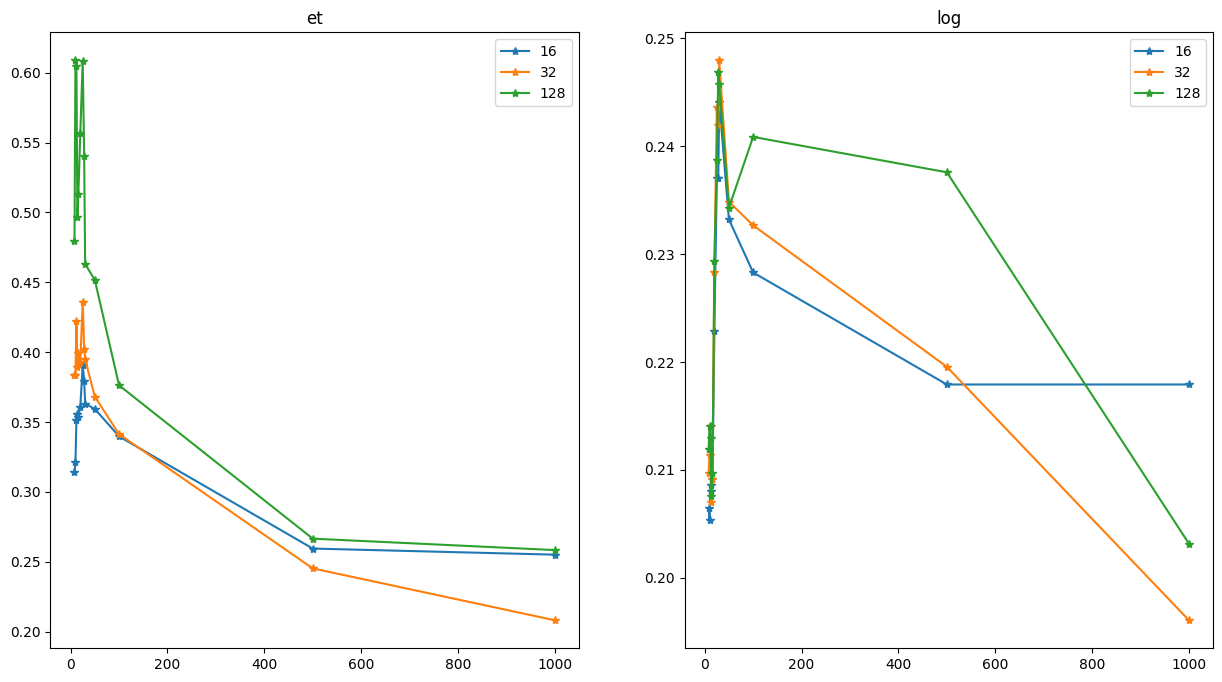

In [5]:
ns=[16,32,128]
n_comps= [8,10,12,14,16,20,25,28,30,50,100, 500 ,1000]

scores_image_sizes_et= []
scores_image_sizes_log= []

for n in ns: 
    scores_et=[]
    scores_log=[]
    for n_comp in n_comps: 
        X_train,X_val,X_test,y_train,y_val, y_test , X_train_val,y_train_val=preprocessing(n,n_comp,images,y )
        extra_trees_clf = ExtraTreesClassifier(n_estimators=100,random_state=21, n_jobs=-1)
        logreg_clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    # et_clf_gray = ExtraTreesClassifier(n_estimators=100,random_state=21, n_jobs=-1)

        extra_trees_clf.fit(X_train,y_train)
        logreg_clf.fit(X_train,y_train)
        score_et=extra_trees_clf.score(X_val,y_val)
        score_log=logreg_clf.score(X_val,y_val)
        scores_et.append(score_et)
        scores_log.append(score_log)

    scores_image_sizes_et.append(scores_et)
    scores_image_sizes_log.append(scores_log)
# et_clf_gray.fit(X_train_gray,y_train)


#et_pred_val = extra_trees_clf.predict(X_val)
# et_pred_val_gray = et_clf_gray.predict(X_val_gray)

#display_confusion_matrix(y_val, et_pred_val) 
#print(classification_report(y_val, et_pred_val))


fig,ax= plt.subplots(1,2,figsize=(15,8) )

for i in range(len(ns)): 
    ax[0].plot(n_comps,scores_image_sizes_et[i], '-*',label=f"{ns[i]}"  )
    ax[1].plot(n_comps,scores_image_sizes_log[i],'-*' ,label=f"{ns[i]}" )
ax[0].legend()
ax[0].set_title('et')
ax[1].legend()
ax[1].set_title('log')

In [6]:
scores= np.array(scores_image_sizes_et[1]) 
i= np.argmax(scores)
print(i)
print(n_comps[i])

6
25


relative importance of the differenet color chanels
Red :0.24814540881902358
Blue :0.254330622543932
Green :0.25080484665547825
Gray :0.24671912198156662


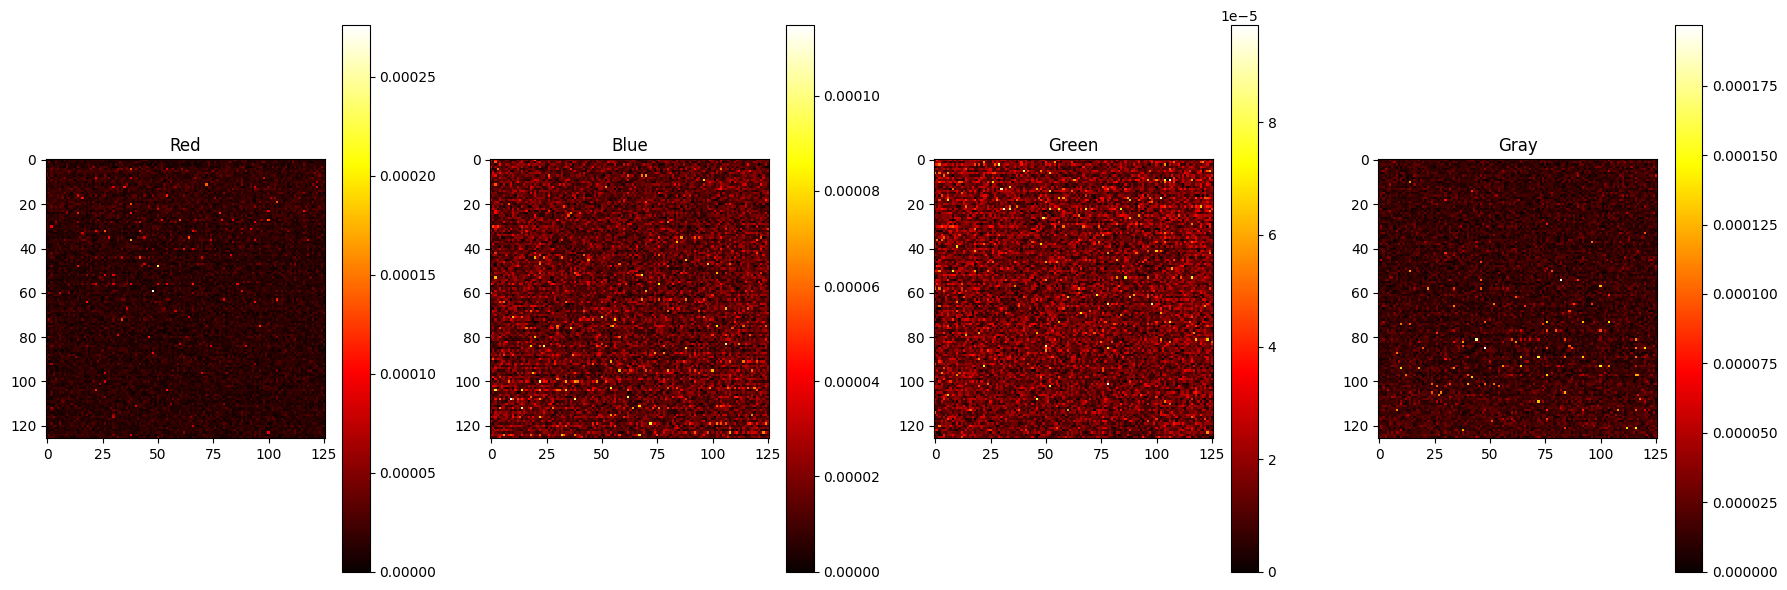

In [ ]:
def plot_digit(data,n,ax):
    image = data.reshape(n, n)
    im=ax.imshow(image, cmap=mpl_cm.hot, interpolation="nearest")
    plt.colorbar(im, ax=ax)
    return sum(data)
n=126 
imResizer=ImageResizer(height=n, width=n)
images_rgb_gray= imResizer.add_grayscale(images)
resized_images= imResizer.transform(images_rgb_gray)
augmented_resized_images,augmented_y =imResizer.add_rotation_copies(resized_images,y)
images_training_data= imResizer.flatten(augmented_resized_images)

X_train_val, X_test, y_train_val , y_test =train_test_split(images_training_data, augmented_y ,test_size=0.1 ,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42)

rescaler=StandardScaler() 

X_train=rescaler.fit_transform(X_train)
X_val=rescaler.transform(X_val)
X_test=rescaler.transform(X_test)


importance=[] 

n_colors=4
fig,axes= plt.subplots(1,n_colors, figsize=(18,6))

extra_trees_clf = ExtraTreesClassifier(n_estimators=100,random_state=21, n_jobs=-1)
       
extra_trees_clf.fit(X_train,y_train)

feature_importance=extra_trees_clf.feature_importances_
colors_layers= ["Red","Blue","Green","Gray"]
for i in range(n_colors): 
    sigma= plot_digit(feature_importance[n**2*i:n**2*(i+1)],n ,axes[i])
    axes[i].set_title(colors_layers[i]) 
    importance.append(sigma)


fig.tight_layout()


print("relative importance of the differenet color chanels")
for i in range(n_colors): 
    print(colors_layers[i], f":{importance[i]}")




In [4]:
n=128 

imResizer=ImageResizer(height=n, width=n)   
images_rgb_gray= imResizer.add_grayscale(images)
resized_images= imResizer.transform(images_rgb_gray)
augmented_resized_images,augmented_y =imResizer.add_rotation_copies(resized_images,y)
images_training_data= imResizer.flatten(augmented_resized_images)


X_train_val, X_test, y_train_val , y_test =train_test_split(images_training_data, augmented_y ,test_size=0.1 ,random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape )


np.save(f"./preprocessed_data/X_train_full_{n}.npy",X_train)
np.save(f"./preprocessed_data/X_val_full_{n}.npy",X_val)
np.save(f"./preprocessed_data/X_test_full_{n}.npy",X_test)
np.save(f"./preprocessed_data/y_train_full_{n}.npy",y_train)
np.save(f"./preprocessed_data/y_val_full_{n}.npy",y_val)
np.save(f"./preprocessed_data/y_test_full_{n}.npy",y_test)

# clear variables from memory. 
del images_rgb_gray
del augmented_resized_images
del images_training_data
del X_train_val
del X_train
del X_val 
del X_test

(7323, 65536) (7323,)


In [ ]:



n_batches=100
X_train=np.load(f"./preprocessed_data/X_train_full_{n}.npy", mmap_mode='r')


rows= X_train.shape[0]
batch_size=int(rows//n_batches) 
rescaler=StandardScaler() 

for i in range(n_batches): 
    start_index=i*batch_size
    end_index=(i+1)*batch_size 
    if end_index > rows:
        end_index=rows
    batch= X_train[start_index:end_index]


    rescaler.partial_fit(batch)


scaledX_train = np.memmap('./preprocessed_data/tmp.npy', dtype=X_train.dtype, mode='w+', shape=X_train.shape)
for i in range(n_batches): 
    start_index=i*batch_size
    end_index=(i+1)*batch_size 
    if end_index > rows:
        end_index=rows
    batch= X_train[start_index:end_index]

    scaled_batch= rescaler.transform(batch)
    scaledX_train[start_index:end_index] = scaled_batch

scaledX_train.flush()
# X_train= rescaler.transform(X_train)
# X_val=rescaler.transform(X_val)
# X_test=rescaler.transform(X_test)

joblib.dump( rescaler,f"preprocessed_data/scaler_{n}.pkl")

np.save(f"./preprocessed_data/X_train_scaled_full_{n}.npy", scaledX_train)
del X_train
del scaledX_train

os.remove("./preprocessed_data/tmp.npy")




In [6]:
X_train= np.load(f"./preprocessed_data/X_train_scaled_full_{n}.npy", mmap_mode='r')

n_batches=100
n_comp=10


batch_size=int(rows//n_batches) 
ipca=IncrementalPCA(n_components=n_comp)

for i in range(n_batches): 
    start_index=i*batch_size
    end_index=(i+1)*batch_size 
    if end_index > rows:
        end_index=rows
    batch= X_train[start_index:end_index]
    ipca.partial_fit(batch)


X_train_scaledPCA = np.memmap('./preprocessed_data/tmp.npy', dtype=X_train.dtype, mode='w+', shape=(X_train.shape[0], n_comp) )
for i in range(n_batches): 
    start_index=i*batch_size
    end_index=(i+1)*batch_size 
    if end_index > rows:
        end_index=rows
    batch= X_train[start_index:end_index]

    scaled_batch= ipca.transform(batch)
    X_train_scaledPCA[start_index:end_index] = scaled_batch

X_train_scaledPCA.flush()
np.save(f"./preprocessed_data/X_train_scaled_pca_{n}_ncomp_{n_comp}.npy", X_train_scaledPCA)
joblib.dump(ipca,f"preprocessed_data/ipca_{n}_ncomp_{n_comp}.pkl")
del X_train
del X_train_scaledPCA

os.remove("./preprocessed_data/tmp.npy")


# X_val=pca.transform(X_val) 
# X_test=pca.transform(X_test) 


In [9]:

X_val=np.load(f"./preprocessed_data/X_val_full_{n}.npy")
rescaler=joblib.load(f"preprocessed_data/scaler_{n}.pkl")
ipca=joblib.load(f"preprocessed_data/ipca_{n}_ncomp_{n_comp}.pkl")
X_val_scaled=rescaler.transform(X_val)
del X_val
X_val_scaled_pca=ipca.transform(X_val_scaled)
np.save("./preprocessed_data/X_val_scaled_pca_{n}_ncomp_{n_comp}.npy",X_val_scaled_pca)
del X_val_scaled 

In [13]:
X_train=np.load(f"./preprocessed_data/X_train_scaled_pca_{n}_ncomp_{n_comp}.npy")
X_val=np.load("./preprocessed_data/X_val_scaled_pca_{n}_ncomp_{n_comp}.npy")

y_train=np.load(f"preprocessed_data/y_train_full_{n}.npy")
y_val=np.load(f"preprocessed_data/y_val_full_{n}.npy")


extra_trees_clf = ExtraTreesClassifier(n_estimators=100,random_state=21, n_jobs=-1)
logreg_clf = LogisticRegression(max_iter=1000, n_jobs=-1)


extra_trees_clf.fit(X_train,y_train)
logreg_clf.fit(X_train,y_train)
score_et=extra_trees_clf.score(X_val,y_val)
score_log=logreg_clf.score(X_val,y_val)

# et_clf_gray.fit(X_train_gray,y_train)
print(score_et)
print(score_log)


#et_pred_val = extra_trees_clf.predict(X_val)
# et_pred_val_gray = et_clf_gray.predict(X_val_gray)

#display_confusion_matrix(y_val, et_pred_val) 
#print(classification_report(y_val, et_pred_val))

0.10595303113052977
0.12397596941561988


In [ ]:
######################### Data_Transformation from loading to data_preped for use:  ########################################
#with single batch fitting: 

n=128
n_comp=25


#load data
dirpath="./CCSN_v2"
class_dirs=listdir(dirpath)
lists_image_names=[]
for dir in class_dirs: 
    lists_image_names.append(listdir(dirpath+"/"+dir))


images= []
y=[] 
for  i in range(len(class_dirs)): 
    for image_name in lists_image_names[i]: 
        im=cv2.imread( dirpath+"/"+class_dirs[i]+"/"+image_name )
        im= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        images.append(im)
        y.append(class_dirs[i])

y=np.array(y)



imResizer=ImageResizer(height=n, width=n)
images_rgb_gray= imResizer.add_grayscale(images)
resized_images= imResizer.transform(images_rgb_gray)
augmented_resized_images,augmented_y =imResizer.add_rotation_copies(resized_images,y)
images_training_data= imResizer.flatten(augmented_resized_images)



X_train_val, X_test, y_train_val , y_test =train_test_split(images_training_data, augmented_y ,test_size=0.1 ,random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42)



np.save(f"./preprocessed_data/X_train_full_{n}_singleBatch.npy",X_train)
np.save(f"./preprocessed_data/X_val_full_{n}_singleBatch.npy",X_val)
np.save(f"./preprocessed_data/X_test_full_{n}_singleBatch.npy",X_test)
np.save(f"./preprocessed_data/y_train_full_{n}_singleBatch.npy",y_train)
np.save(f"./preprocessed_data/y_val_full_{n}_singleBatch.npy",y_val)
np.save(f"./preprocessed_data/y_test_full_{n}_singleBatch.npy",y_test)



# clear variables from memory. 
del images_rgb_gray
del augmented_resized_images
del images_training_data
del X_train_val
del X_val 
del X_test
del y_val
del y_test


scaler=StandardScaler() 

X_train_scaled=scaler.fit_transform(X_train)
np.save(f"./preprocessed_data/X_train_scaled_{n}_ncomp_{n_comp}_singleBatch.npy", X_train_scaled)
joblib.dump(scaler,f"preprocessed_data/scaler_{n}_ncomp_{n_comp}_singleBatch.pkl")

del scaler 


pca=PCA(n_components=n_comp, random_state=42) 
#pca=KernelPCA(n_components=n_comp,kernel="cosine", random_state=42 ) 
X_train_scaledPCA=pca.fit_transform(X_train_scaled) 

np.save(f"./preprocessed_data/X_train_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy", X_train_scaledPCA)
joblib.dump(pca,f"preprocessed_data/pca_{n}_ncomp_{n_comp}_singleBatch.pkl")
del X_train_scaled




ERROR! Session/line number was not unique in database. History logging moved to new session 184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-484050.22569676815..1150013.6234316896].


Text(0.5, 0.98, " 'unit volume of 10 features")

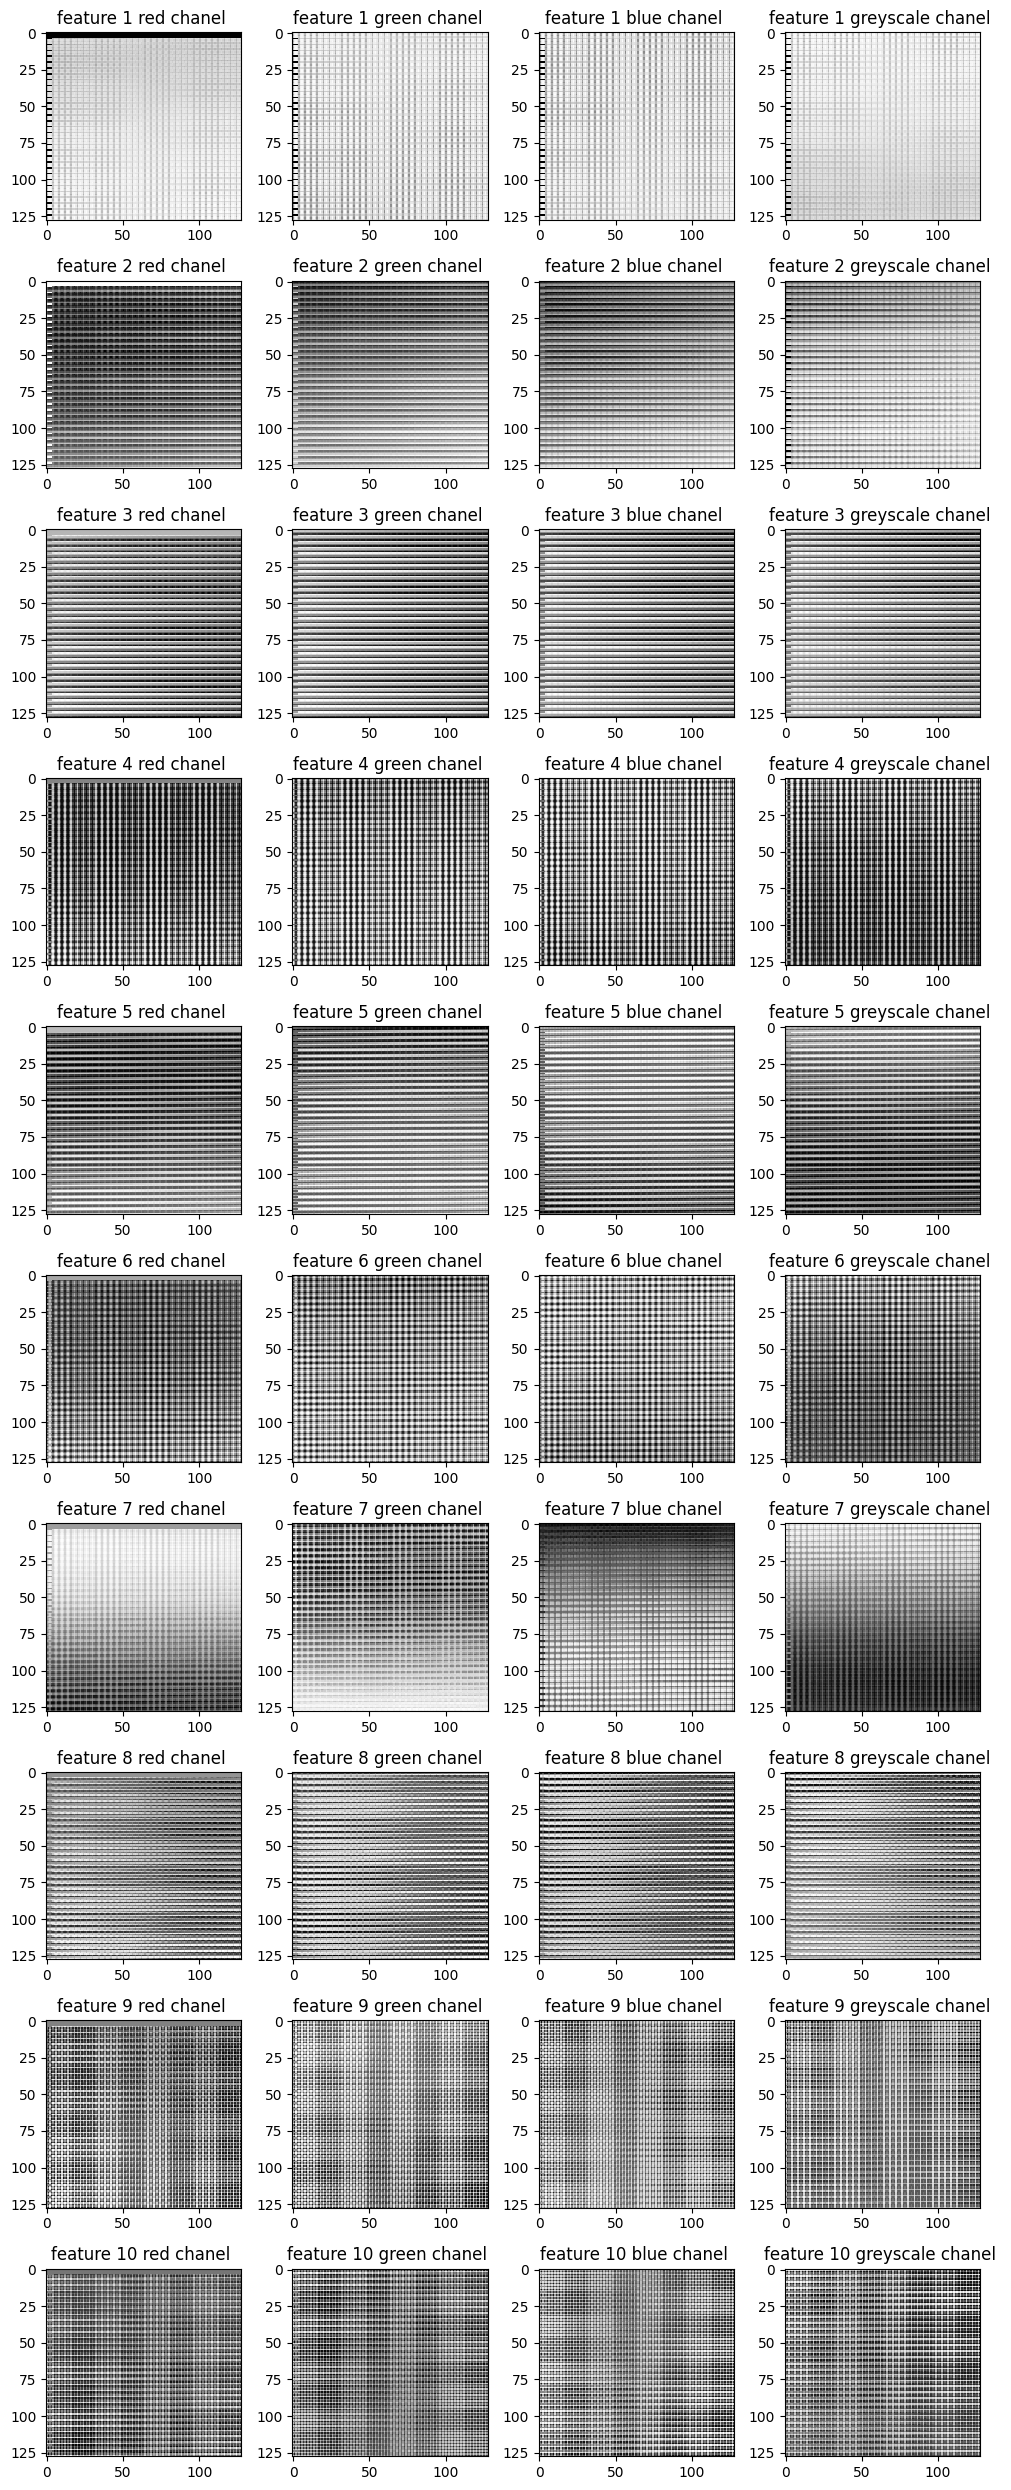

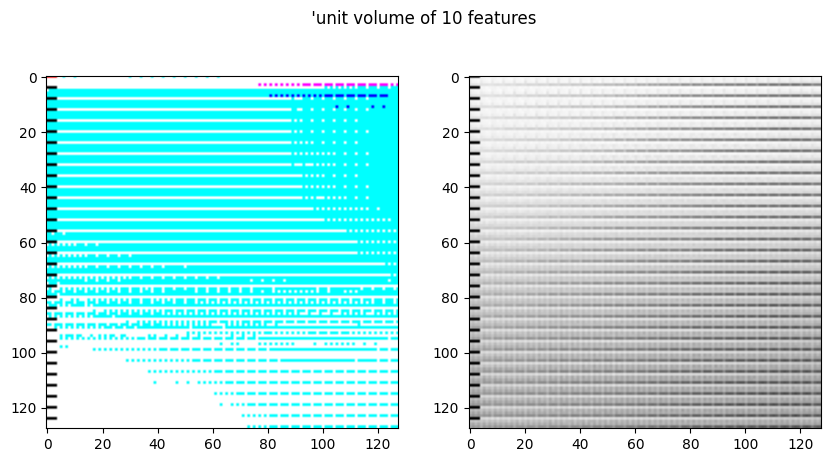

In [94]:
# visualiszation of the 
pca=joblib.load("preprocessed_data/pca_128_ncomp_10.pkl")

n2=128*128 

X= pca.components_
S2=pca.explained_variance_


A=(X.transpose()*S2).transpose()


fig ,axs= plt.subplots(10,4, figsize=(10,25))
axes=axs.flatten()



for i in range(len(X)): 
    images= X[i]
    red=images[0:n2].reshape(128,128)
    green=images[n2:2*n2].reshape(128,128)
    blue= images[2*n2:3*n2].reshape(128,128)
    grey= images[3*n2:4*n2].reshape(128,128)

    axes[4*i].imshow(red, cmap='Greys_r', interpolation='nearest', aspect='auto')  #vmin=global_min, vmax=global_max, cmap='Greys_r', interpolation='nearest', aspect='auto')
    axes[4*i].set_title(f"feature {i+1} red chanel ")
    axes[4*i+1].imshow(green, cmap='Greys_r', interpolation='nearest', aspect='auto')  #vmin=global_min, vmax=global_max, cmap='Greys_r', interpolation='nearest', aspect='auto')
    axes[4*i+1].set_title(f"feature {i+1} green chanel ")
    axes[4*i+2].imshow(blue, cmap='Greys_r', interpolation='nearest', aspect='auto')  #vmin=global_min, vmax=global_max, cmap='Greys_r', interpolation='nearest', aspect='auto')
    axes[4*i+2].set_title(f"feature {i+1} blue chanel ")
    axes[4*i+3].imshow(grey, cmap='Greys_r', interpolation='nearest', aspect='auto')  #vmin=global_min, vmax=global_max, cmap='Greys_r', interpolation='nearest', aspect='auto')
    axes[4*i+3].set_title(f"feature {i+1} greyscale chanel ")



# fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label='Effect on variance')
fig.tight_layout()

a=A.sum(axis=0) 
unitA_red=a[0:n2].reshape(128,128)
unitA_red=unitA_red.reshape(unitA_red.shape+(1,))

unitA_green=a[n2:2*n2].reshape(128,128)
unitA_green=unitA_green.reshape(unitA_green.shape+(1,))


unitA_blue=a[2*n2:3*n2].reshape(128,128)
unitA_blue=unitA_blue.reshape(unitA_blue.shape+(1,))

unitA_grey=a[3*n2:4*n2].reshape(128,128)

tmpunit=np.concat((unitA_red,unitA_green),axis=2)
unitA=np.concat((tmpunit,unitA_blue), axis=2)


fig ,axes =plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(unitA)
axes[1].imshow(unitA_grey, cmap="Greys_r")
fig.suptitle(" 'unit volume of 10 features")

In [20]:
n=128
n_comp=10

scaler=joblib.load(f"preprocessed_data/scaler_{n}_ncomp_{n_comp}_singleBatch.pkl")
pca=joblib.load("preprocessed_data/pca_128_ncomp_10.pkl")
X_val= np.load(f"./preprocessed_data/X_val_full_{n}_singleBatch.npy")
X_test= np.load(f"./preprocessed_data/X_test_full_{n}_singleBatch.npy")

X_val_scaled=scaler.transform(X_val)
X_val_scaledPCA= pca.transform(X_val_scaled)

X_test_scaled=scaler.transform(X_test)
X_test_scaledPCA= pca.transform(X_test_scaled)



np.save(f"./preprocessed_data/X_val_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy", X_val_scaledPCA)
np.save(f"./preprocessed_data/X_test_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy", X_test_scaledPCA)

del X_val_scaled
del X_test_scaled



In [ ]:
n=128
n_comp=25
X_train= np.load(f"./preprocessed_data/X_train_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy")
X_val= np.load(f"./preprocessed_data/X_val_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy")
X_test= np.load(f"./preprocessed_data/X_test_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy")

y_train=np.load(f"./preprocessed_data/y_train_full_{n}_singleBatch.npy")
y_val=np.load(f"./preprocessed_data/y_val_full_{n}_singleBatch.npy")
y_test=np.load(f"./preprocessed_data/y_test_full_{n}_singleBatch.npy")

# Define the models and their respective hyperparameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ["None", 'l2']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'ExtraTreesClassifier': {
        'model': ExtraTreesClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}



best_models = {}

for name, config in models.items():
    print(f"Training {name} with GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,  # Use 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1  # Use all available cores
    )
    
    # Train on the training set
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")
    
    # Store the best model
    best_models[name] = grid_search.best_estimator_
    print("-" * 50)


Training LogisticRegression with GridSearchCV...


c:\Users\westh\repos\python\AI_1\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\westh\repos\python\AI_1\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\westh\repos\python\AI_1\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\westh\repos\python\AI_1\.venv\Lib\site-packag

Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2'}
Best cross-validation score for LogisticRegression: 0.2567
--------------------------------------------------
Training RandomForestClassifier with GridSearchCV...
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 300}
Best cross-validation score for RandomForestClassifier: 0.5125
--------------------------------------------------
Training ExtraTreesClassifier with GridSearchCV...
Best parameters for ExtraTreesClassifier: {'max_depth': 30, 'n_estimators': 300}
Best cross-validation score for ExtraTreesClassifier: 0.5694
--------------------------------------------------
Training SVC with GridSearchCV...


KeyboardInterrupt: 

In [3]:
n=128
n_comp=10
X_train= np.load(f"./preprocessed_data/X_train_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy")
X_val= np.load(f"./preprocessed_data/X_val_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy")
X_test= np.load(f"./preprocessed_data/X_test_scaled_pca_{n}_ncomp_{n_comp}_singleBatch.npy")

poly=PolynomialFeatures(2)
X_train=poly.fit_transform(X_train)
X_val=poly.transform(X_val)
X_test=poly.transform(X_test)

y_train=np.load(f"./preprocessed_data/y_train_full_{n}_singleBatch.npy")
y_val=np.load(f"./preprocessed_data/y_val_full_{n}_singleBatch.npy")
y_test=np.load(f"./preprocessed_data/y_test_full_{n}_singleBatch.npy")

# Define the models and their respective hyperparameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['saga'], 
            'max_iter': [500,1000] 
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'ExtraTreesClassifier': {
        'model': ExtraTreesClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30]
        }
    },
    # 'LinearSVC': { # Use LinearSVC instead of SVC
    #     'model': LinearSVC(random_state=42),
    #     'params': {
    #         'C': [0.1, 1, 10],
    #         'penalty': ['l1', 'l2'] # LinearSVC only has linear kernels
    #     }
    # }
}


best_models = {}
best_parameters={}

for name, config in models.items():
    print(f"Training {name} with GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,  # Use 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1  # Use all available cores
    )
    
    # Train on the training set
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")
    
    # Store the best model
    best_models[name] = grid_search.best_estimator_
    best_parameters[name] = grid_search.best_params_
    print("-" * 50)


Training LogisticRegression with GridSearchCV...


c:\Users\westh\repos\python\AI_1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for LogisticRegression: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score for LogisticRegression: 0.2395
--------------------------------------------------
Training RandomForestClassifier with GridSearchCV...
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 300}
Best cross-validation score for RandomForestClassifier: 0.5808
--------------------------------------------------
Training ExtraTreesClassifier with GridSearchCV...
Best parameters for ExtraTreesClassifier: {'max_depth': None, 'n_estimators': 300}
Best cross-validation score for ExtraTreesClassifier: 0.6422
--------------------------------------------------


              precision    recall  f1-score   support

          Ac       0.94      0.86      0.89       104
          As       0.76      0.76      0.76        71
          Cb       0.90      0.92      0.91       102
          Cc       0.88      0.80      0.84       122
          Ci       0.95      0.94      0.94        63
          Cs       0.77      0.77      0.77        94
          Ct       0.92      0.96      0.94        81
          Cu       0.84      0.85      0.84        66
          Ns       0.81      0.88      0.84       105
          Sc       0.78      0.84      0.81       132
          St       0.69      0.64      0.67        78

    accuracy                           0.84      1018
   macro avg       0.84      0.84      0.84      1018
weighted avg       0.84      0.84      0.84      1018



['model/et_pipeline__CloudPredictor_128_ncomp_10_singleBatch.pkl']

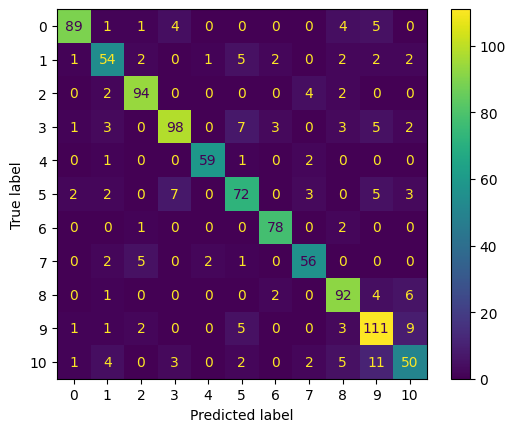

In [ ]:
n=128
n_comp=10 
best_parameters_et= {'max_depth': None, 'n_estimators': 300}


X_train=np.load("preprocessed_data/X_train_full_128_singleBatch.npy")
X_val=np.load("preprocessed_data/X_val_full_128_singleBatch.npy")
X_test=np.load("preprocessed_data/X_test_full_128_singleBatch.npy")
y_train=np.load(f"./preprocessed_data/y_train_full_{n}_singleBatch.npy")
y_val=np.load(f"./preprocessed_data/y_val_full_{n}_singleBatch.npy")
y_test=np.load(f"./preprocessed_data/y_test_full_{n}_singleBatch.npy")


X_train_val=np.concat((X_train,X_val), axis=0 )
y_train_val=np.concat((y_train,y_val), axis=0 )

del X_train,X_val,y_train,y_val



pipeline_steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_comp, random_state=21)),
    ('poly', PolynomialFeatures(2)),
    ('et', ExtraTreesClassifier(**best_parameters_et, random_state=21))
]

# 3. Create the pipeline
et_pipeline = Pipeline(steps=pipeline_steps)

et_pipeline.fit(X_train_val, y_train_val)

joblib.dump(et_pipeline, f"model/et_pipeline__train_val_{n}_ncomp_{n_comp}_singleBatch.pkl")

et_pred_test=et_pipeline.predict(X_test)


display_confusion_matrix(y_test, et_pred_test) 
print(classification_report(y_test, et_pred_test))




et_pipeline_final_model=Pipeline(steps=pipeline_steps)

X=np.concat((X_train_val,X_test), axis=0 )
y=np.concat((y_train_val,y_test), axis=0 )
del X_train_val, X_test,y_train_val,y_test

et_pipeline_final_model.fit(X, y)
joblib.dump(et_pipeline, f"model/et_pipeline__CloudPredictor_{n}_ncomp_{n_comp}_singleBatch.pkl")


In [ ]:
ET =best_models['ExtraTreesClassifier']


X_val=np.load("preprocessed_data/X_val_full_128_singleBatch.npy")
y_val=np.load(f"./preprocessed_data/y_val_full_{n}_singleBatch.npy")
pred_test=et_pipeline.predict(X_test)


display_confusion_matrix(y_test, et_pred_test) 
print(classification_report(y_test, et_pred_test))


NameError: name 'scores' is not defined